In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy.signal import find_peaks
from IPython.display import Video

# Correlación cruzada

La correlacion cruzada es una medida de la similitud de 2 señales, que es de utilidad para encontrar características de señales poco conocidas a partir de una señal que conocemos.

Empecemos con un ejemplo clásico de una aplicación de la correlación cruzada, el Radar
El radar es un sistema que permite medir distancias, velocidades y de objetos, utilizando ondas electrómagnéticas a frecuencias determinadas que se reflejan sobre dichos objetos.
Sin embargo estas señales deben de procesarse para estimar las variables de interés.

![Diagrama Radar](assets/radar.png "Title")

In [2]:
Video("assets/xcorr.mp4", width=640, height=480, embed=True)

# Pero, cómo podemos calcular la distancia teniendo el retardo de la señal?

La distancia puede ser calculada utilizando la siguiente fórmula:
$$ d = \frac{c*t}{2}, $$
$$t = T_s * l^*$$


# ¿Cómo se calcula la correlación cruzada?

La correlación cruzada entre 2 señales se calcula con la siguiente expresión

$$ r_{xy}(l) = \sum^{\infty}_{n=-\infty}x(n).y(n-l) $$
$$ r_{xy}(l) = \sum^{\infty}_{n=-\infty}x(n+l).y(n) $$

$l$ representa el retraso relativo entre las señales $x$ y $y$, por ello
$$r_{xy}(l) \neq r_{yx}(l)$$

En cambio tenemos:
$$ r_{xy}(l) = \sum^{\infty}_{n=-\infty}x(n+l).y(n) $$
$$ r_{yx}(l) = \sum^{\infty}_{n=-\infty}y(n).x(n-l) $$

Y llegamos a que:

$$r_{xy}(l) = r_{yx}(-l)$$

## Ejemplo

$$ x(n) = [ -4, 2, 7, 0, -1]$$
$$ y(n) = [0, 1, 3, 0, -2, 4, -4, 8, -10]$$

Encontremos $r_{xy}(l)$

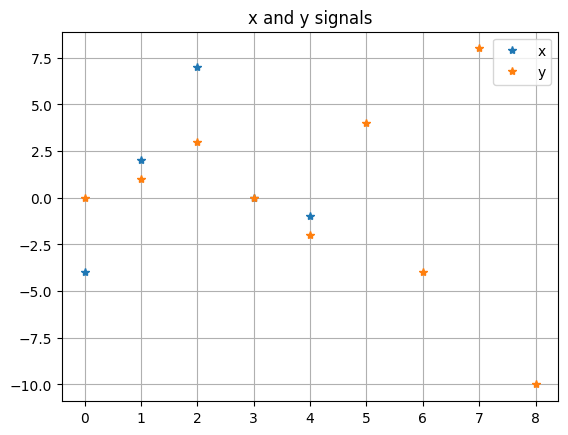

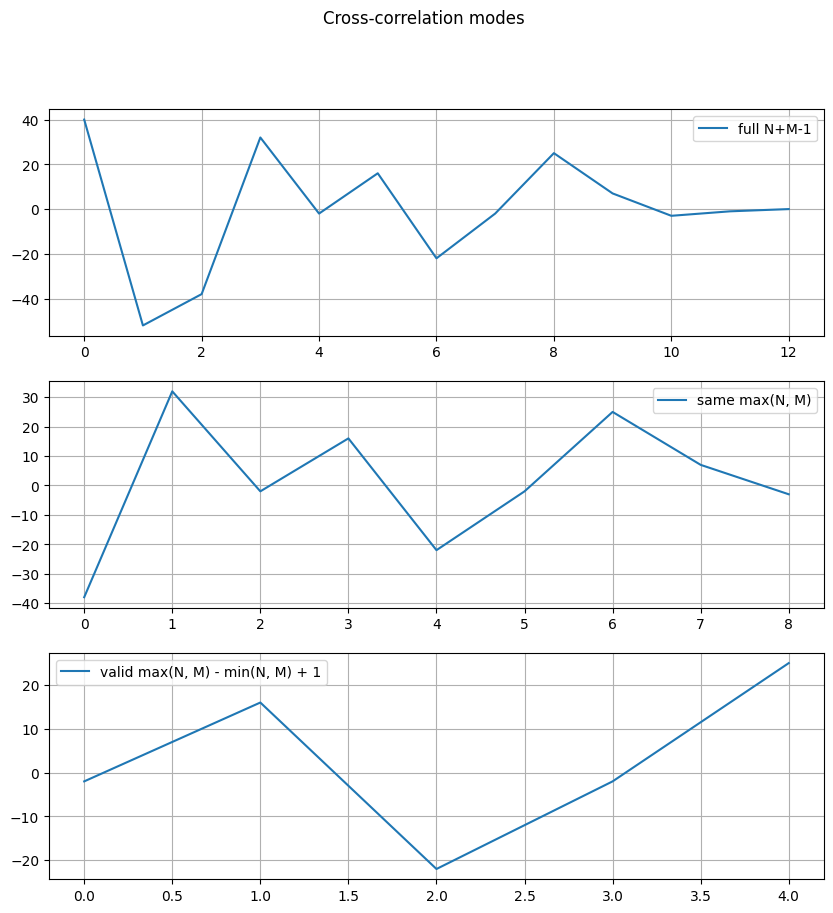

In [40]:
x = [ -4, 2, 7, 0, -1]
y = [0, 1, 3, 0, -2, 4, -4, 8, -10]
plt.plot(x, "*", label="x")
plt.plot(y, "*", label="y")
plt.title("x and y signals")
plt.legend()
plt.grid()


rxy_full = np.correlate(x, y, mode='full')
rxy_same = np.correlate(x, y, mode="same")
rxy_valid = np.correlate(x, y, mode="valid")


fig, ax = plt.subplots(3, 1, figsize=(10, 10))
ax[0].plot(rxy_full, label="full N+M-1")
ax[1].plot(rxy_same, label="same max(N, M)")
ax[2].plot(rxy_valid, label="valid max(N, M) - min(N, M) + 1")
fig.suptitle("Cross-correlation modes")
for a in ax:
    a.legend() 
    a.grid()

# Autocorrelación de una señal
La autocorrelacion de una señal $x(n)$ se calcula aplicando la correlación de la señal consigo misma, es decir 
$$ r_{xx}(l) = \sum^{\infty}_{n=-\infty}x(n).x(n-l) $$

Suele utilizarse para calcular la densidad espectral de energía de una señal, o para estimar su periodicidad en caso de que no sea una señal completamente periódica (señal cuasi-periódica).

$$ x(n) \approx x(n + kT), k \in Z $$
$$ |x(n) - x(n + kT)| < \epsilon, k \in Z $$

## Ejemplo: El numero de Wolf
El numero de Wolf mide la cantidad de las manchas solares, las cuales son regiones en la superficie solar que son considerablemente mas frías que sus alrededores (de 6000 K pasan a 4000 K). En estas áreas se presentan campos magnéticos muy fuertes que inhiben el transporte de calor en estas zonas. Cada una de estas manchas es de un tamaño comparable al de la Tierra.

![Manchas Solares](assets/sunspots.jpg "Title")

Estos cambios en la actividad solar pueden interactuar con los dispositivos electronicos que usamos a diario y ocasionar desde fallos hasta su destrucción. Una manera clara en la que podemos ver la influencia de las explosiones solares son las auroras boreales, que son la representación visual de la interacción entre el campo magnético de la tierra y las explosiones solares (coronal mass ejection o CME).

![Aurora](assets/aurora.jpg "Title")

Por todo esto es importante analizar la cantidad de manchas solares respecto al tiempo.
Usando un dataset que tiene el numero de Wolf mes a mes para varios años, se plantea la hipótesis de que la actividad solar asociada a manchas solares es periódica. Grafiquemos los datos crudos.

Text(0, 0.5, 'Sunspots')

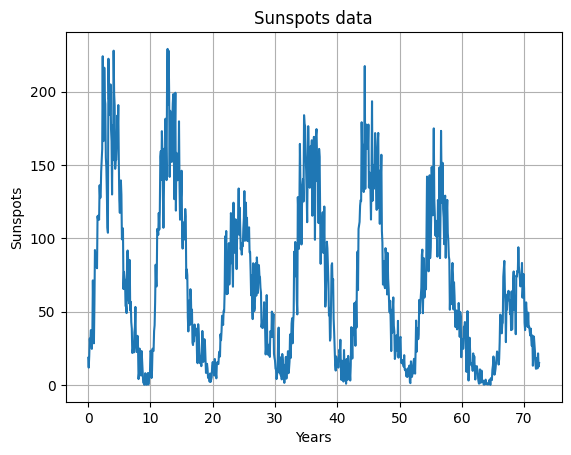

In [44]:
sunspots_data = " ".join(open("assets/sunspots.txt").readlines()).replace("\n", "")
sunspots_data = [float(x) for x in re.sub(r"\s+", ",", sunspots_data).split(",")]
time = np.arange(0, len(sunspots_data), 1)/12
plt.plot(time, sunspots_data)
plt.title("Sunspots data")
plt.grid()
plt.xlabel("Years")
plt.ylabel("Sunspots")

Se observa que la señal no es periódica pura, sin embargo se ve un patron que se repite, utilicemos la autocorrelación para estimar un periodo de la señal.

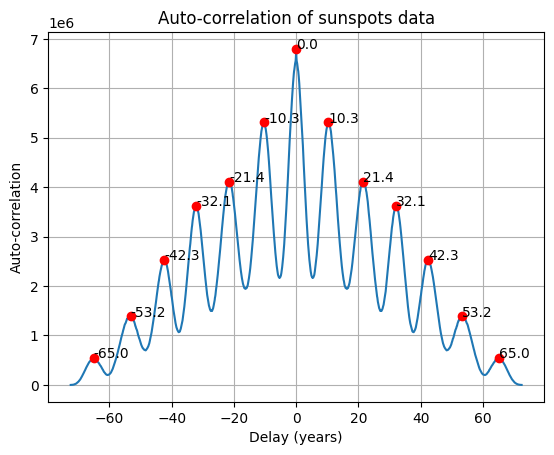

In [43]:
auto_corr = np.correlate(sunspots_data, sunspots_data, mode='full')
delay = np.arange(-len(sunspots_data)+1, len(sunspots_data), 1)/12
local_max = find_peaks(auto_corr, prominence=200000)[0]
plt.plot (delay, auto_corr)
plt.plot(delay[local_max], auto_corr[local_max], 'ro')
plt.title("Auto-correlation of sunspots data")
plt.xlabel("Delay (years)")
plt.ylabel("Auto-correlation")
plt.grid()
for max in local_max:
    plt.text(delay[max], auto_corr[max], str(np.round(delay[max],1)))

Podemos observar que la correlación tiene maximos locales que suceden cerca de cada 10.3 años, este dato es cercano al dato calculado por Heinrich Schwabe de 10.48 para el periodo de la actividad solar.

Ahora miremos un ejemplo con una señal periódica que tiene un fuerte ruido, y obtengamos su periodo

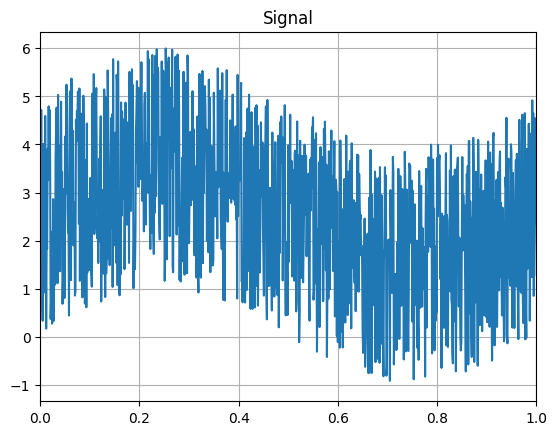

In [49]:

time = np.arange(0, 10, 1/1000)
signal = np.sin(2 * np.pi * 1 * time) + 5 * np.random.rand(len(time))
plt.plot(time, signal)
plt.xlim(0, 1)
plt.title("Signal")
plt.grid()


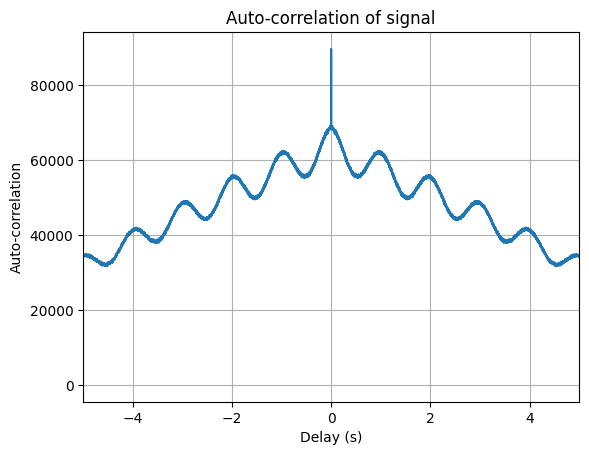

In [50]:
xcorr = np.correlate(signal, signal, mode='full')
delay = np.arange(-len(signal)+1, len(signal), 1)/1000
plt.plot(delay, xcorr)
plt.xlabel("Delay (s)")
plt.ylabel("Auto-correlation")
plt.xlim(-5, 5)
plt.title("Auto-correlation of signal")
plt.grid()


# Propiedades de la correlacion

$$ r_{xx}(l) =  r_{xx}(-l)$$
$$ E_x = r_{xx}(l)|_{l=0}$$
$$|r_{xx}(l)|\le r_{xx}(0) = E_x, \forall ~l~ \in Z$$
$$|r_{xy}(l)|\le \sqrt{r_{xx}(0)r_{yy}(0)} = \sqrt{E_x E_y}, \forall ~l~ \in Z$$

Si x es periodica
$$ r_{xx}(l) = \frac{1}{N}\sum^{N-1}_{n=0}x(n).x(n-l) $$

Relacion entre la correlación y la convolución
$$ r_{xy}(l) = x(l)\ast y(-l)$$

# Correlación normalizada
Segun las señales que se tengan, los rangos de la correlación pueden varias mucho, por esto se plantea una normalización que entrega valores entre 0 y 1 usando las propiedades anteriores

$$\rho_{xy}(l) = \frac{r_{xy}(l)}{\sqrt{E_x E_y}} = \frac{r_{xy}(l)}{\sqrt{r_{xx}(0) r_{yy}(0)}}$$

# Correlación en imágenes.

![Manchas Solares](assets/cross2d.png "Title")

- Se convierte la imagen a blanco y negro
- Se resta el valor promedio a la matriz obtenida para obtener un arreglo bipolar


